usetex mode requires dvipng.


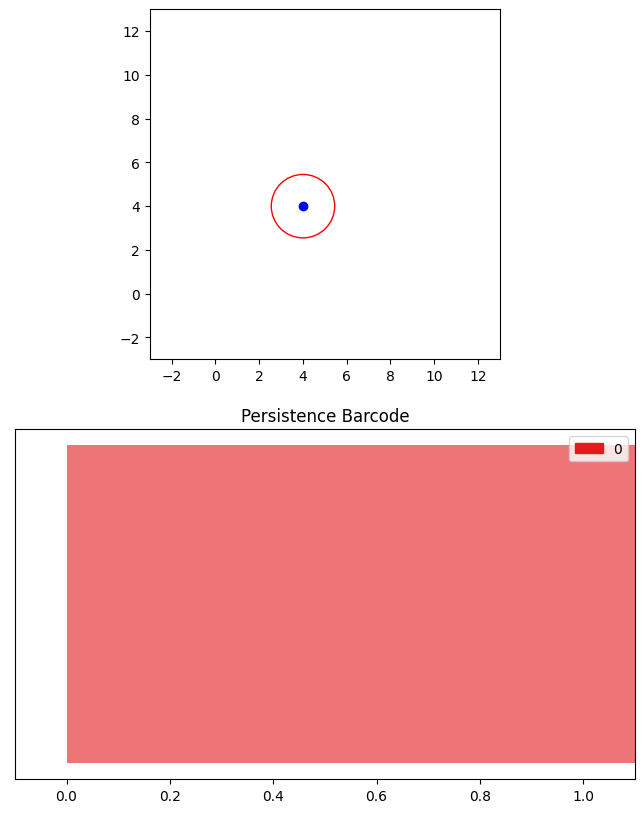

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def compute_persistence_diagram(points):
    # Constructing a Vietoris-Rips complex
    rips_complex = gd.RipsComplex(points=points, max_edge_length=2)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

    # Computing persistence
    persistence = simplex_tree.persistence()

    return simplex_tree, persistence

def plot_persistence_barcode(simplex_tree, ax):
    gd.plot_persistence_barcode(simplex_tree.persistence(), axes=ax)
    ax.set_title("Persistence Barcode")

def update(frame, points, ax, ax_barcode, simplex_tree):
    ax.clear()
    ax_barcode.clear()
    
    # Draw points
    ax.scatter(points[:,0], points[:,1], color='blue')

    # Growing circles
    for point in points:
        circle = plt.Circle(point, radius=frame*0.05, color='red', fill=False)
        ax.add_artist(circle)
    
    # Update plot parameters
    ax.set_xlim(-3, 13)
    ax.set_ylim(-3, 13)
    ax.set_aspect('equal', 'box')

    # Update barcode
    plot_persistence_barcode(simplex_tree, ax_barcode)
    
def makevertices(num_rows = 10, num_cols = 10):
    vertices = np.zeros((num_rows * num_cols, 2))
    for i in range(num_rows):
        for j in range(num_cols):
            vertices[i * num_cols + j] = [j, i]
    p_eliminate = 0.5  # Probability of eliminating a vertex
    for i in range(1, num_rows - 1):
        for j in range(1, num_cols - 1):
            if np.random.rand() < p_eliminate:
                vertices[i * num_cols + j] = [-1, -1]  # Mark the vertex for elimination
    vertices = vertices[~np.all(vertices == [-1, -1], axis=1)]

    return np.array(vertices)


def PH(points):
    simplex_tree, persistence = compute_persistence_diagram(points)
    fig, (ax, ax_barcode) = plt.subplots(2, 1, figsize=(8, 10))
    ani = FuncAnimation(fig, update, frames=np.arange(0, 30, 1), fargs=(points, ax, ax_barcode, simplex_tree), interval=300)
    HTML(ani.to_html5_video())

    
import pandas as pd
import numpy as np


reds = pd.read_csv('/Users/mohsen/Desktop/PH/red_points.csv', header=None)
greens = pd.read_csv('/Users/mohsen/Desktop/PH/green_points.csv', header=None)
x_r = reds.iloc[:, 0].values
y_r = reds.iloc[:, 1].values
reds_array = np.column_stack((x_r, y_r))

x_g = greens.iloc[:, 0].values
y_g = greens.iloc[:, 1].values
greens_array = np.column_stack((x_g, y_g))


points = reds_array
# points = greens_array
# PH(points)

simplex_tree, persistence = compute_persistence_diagram(points)
fig, (ax, ax_barcode) = plt.subplots(2, 1, figsize=(8, 10))
ani = FuncAnimation(fig, update, frames=np.arange(0, 30, 1), fargs=(points, ax, ax_barcode, simplex_tree), interval=300)
HTML(ani.to_html5_video())
